# Pure Python vs Pandas

Let's generate some data:

In [1]:
rows = [
['Aberdeen Township', 18150, 19, 0, 13, 6],
['Absecon', 8380, 21, 0, 4, 15],
['Allendale', 6712, 0, 0, 0, 0],
['Allenhurst', 493, 0, 0, 0, 0],
['Allentown', 1812, 3, 0, 0, 3],
['Alpine', 2314, 1, 0, 0, 1],
['Andover Township', 6273, 1, 0, 0, 1],
]


In [2]:
    import pandas as pd

    df = pd.DataFrame.from_records(rows, columns=['City', 'Population', 'Violent Crimes', 'Murders', 'Roberies', 'Aggrevated Assaults'])

What happens when we try to display our DataFrame?

In [3]:
df

,City,Population,Violent Crimes,Murders,Roberies,Aggrevated Assaults
0,Aberdeen Township,18150,19,0,13,6
1,Absecon,8380,21,0,4,15
2,Allendale,6712,0,0,0,0
3,Allenhurst,493,0,0,0,0
4,Allentown,1812,3,0,0,3
5,Alpine,2314,1,0,0,1
6,Andover Township,6273,1,0,0,1


Answers in pure Python:

In [4]:
# Q1 
sum_people = 0
sum_violent_crimes = 0
for row in rows:
	sum_people += row[1]
	sum_violent_crimes += row[2]
	
violent_crimes_ratio = sum_violent_crimes / sum_people
violent_crimes_per_thousand_people = violent_crimes_ratio * 1000

# Q2
sum_aggrevated_assaults = 0
sum_violent_crimes = 0
for row in rows:
	sum_aggrevated_assaults += row[5]
	sum_violent_crimes += row[2]
	
aggrevated_assault_ratio = sum_aggrevated_assaults / sum_violent_crimes

# Q3
violent_crimes_per_1k_people_per_city = list()
for row in rows:
	result_row = [row[0], 1000 * row[2] / row[1]]
	violent_crimes_per_1k_people_per_city.append(result_row)

violent_crimes_per_thousand_people, aggrevated_assault_ratio, violent_crimes_per_1k_people_per_city

(1.0196220600897268,
 0.5777777777777777,
 [['Aberdeen Township', 1.046831955922865],
  ['Absecon', 2.5059665871121717],
  ['Allendale', 0.0],
  ['Allenhurst', 0.0],
  ['Allentown', 1.6556291390728477],
  ['Alpine', 0.43215211754537597],
  ['Andover Township', 0.15941335883947075]])

Answers in Pandas:

In [5]:
# Q1
violent_crimes_per_thousand_people = 1000 * df['Violent Crimes'].sum() / df['Population'].sum()

# Q2
aggrevated_assault_ratio = df['Aggrevated Assaults'].sum() / df['Violent Crimes'].sum()

# Q3
stats_per_city = df.groupby('City').sum()
stats_per_city['Violent Crimes Per 1000'] = 1000 * stats_per_city['Violent Crimes'] / stats_per_city['Population']

violent_crimes_per_thousand_people, aggrevated_assault_ratio, stats_per_city[['Violent Crimes Per 1000']]

(1.0196220600897268,
 0.5777777777777777,
                    Violent Crimes Per 1000
 City                                      
 Aberdeen Township                 1.046832
 Absecon                           2.505967
 Allendale                         0.000000
 Allenhurst                        0.000000
 Allentown                         1.655629
 Alpine                            0.432152
 Andover Township                  0.159413)

Now, for a plot!

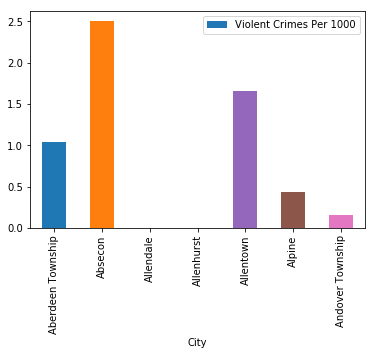

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

stats_per_city.plot(y='Violent Crimes Per 1000', kind='bar')